# Estración de Características en Textos
## [Bag-of-Words](https://www.kaggle.com/code/pattnaiksatyajit/bag-of-words)

En muchas tareas como la detección de **spam**, las datos de entrada son cadenas de texto con longitud variables. Este tipo de datos dista bastante de lo que se necesitan para los algortimos de Machine Learning en scikit-learn. Existe una forma efectiva que transforma los datos textuales en una representación numérica, utilizando el método conocido como **bag-of-words** que entrega una estructura compatible con scikit-learn.


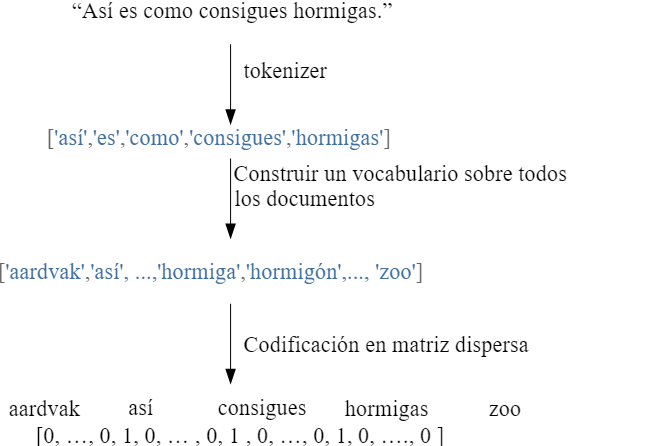!


In [1]:
X = ["La mente necesita libros como la espada necesita una piedra de afilar", "si quiere mantener su agudeza"]
# | la | mente | necesita | libros | como | espada | una | piedra | de | afilar
# | si | quiere | mantener | su | agudeza
#
# ['afilar', 'agudeza', 'como', 'de', 'espada', 'la', 'libros', 'mantener', 'mente', 'necesita', 'piedra', 'quiere', 'si', 'su','una']
# [1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 1]
# [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0]

In [2]:
len(X)

2

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizacion = CountVectorizer()
vectorizacion.fit(X)

CountVectorizer()

In [4]:
vectorizacion.vocabulary_

{'la': 5,
 'mente': 8,
 'necesita': 9,
 'libros': 6,
 'como': 2,
 'espada': 4,
 'una': 14,
 'piedra': 10,
 'de': 3,
 'afilar': 0,
 'si': 12,
 'quiere': 11,
 'mantener': 7,
 'su': 13,
 'agudeza': 1}

In [5]:
X_bag_of_words = vectorizacion.transform(X)

In [6]:
X_bag_of_words.shape

(2, 15)

In [7]:
type(X_bag_of_words)

scipy.sparse._csr.csr_matrix

In [8]:
X_bag_of_words.toarray()

array([[1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0]], dtype=int64)

In [9]:
vectorizacion.get_feature_names_out()

array(['afilar', 'agudeza', 'como', 'de', 'espada', 'la', 'libros',
       'mantener', 'mente', 'necesita', 'piedra', 'quiere', 'si', 'su',
       'una'], dtype=object)

In [10]:
vectorizacion.inverse_transform(X_bag_of_words)

[array(['afilar', 'como', 'de', 'espada', 'la', 'libros', 'mente',
        'necesita', 'piedra', 'una'], dtype='<U8'),
 array(['agudeza', 'mantener', 'quiere', 'si', 'su'], dtype='<U8')]

## Codificación tf-idf

[Google td-idf](https://rockcontent.com/es/blog/que-es-tf-idf/)

[TD-IDF Notebook](http://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/master/machine_learning/scikit-learn/tfidf_scikit-learn.ipynb)

Una transformación bastante útil que a menudo es aplicada a la codificación **bag-of-words** es el escalado **term-frequency inverse-document-frequency**. Es una transformación no lineal del conteo de palabras. Consiste en una medida numérica que expresa cuán relevante es una palabra para un documento en una colección. Esta medida se utiliza a menudo como un factor de ponderación en recuperación de información y en minería de textos. El valor tf-idf aumenta proporcionalmente al número de veces que una palabra aparece en el documento, pero es compensado por la frecuencia de la palabra en la colección global de documentos, lo que permite manejar el hecho de que algunas palabras son generalmente más comunes que otras.

La codificación tf-idf rescala las palabras que son comunes para que tengan menos peso:

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(X)

TfidfVectorizer()

In [12]:
import numpy as np
np.set_printoptions(precision=2)

print(tfidf.transform(X).toarray())

[[0.25 0.   0.25 0.25 0.25 0.5  0.25 0.   0.25 0.5  0.25 0.   0.   0.
  0.25]
 [0.   0.45 0.   0.   0.   0.   0.   0.45 0.   0.   0.   0.45 0.45 0.45
  0.  ]]


Los tf-idfs son una forma de representar documentos como vectores de características. Se pueden entender como una modificación de la frecuencia de aparición de términos (tf): tf nos da una idea acerca de cuántas veces aparece el término en el documento (o patrón). La idea del tf-idf es bajar el peso de los términos proporcionalmente al número de documentos en que aparecen. Así, si un término aparece en muchos documentos en principio puede ser poco importante o al menos no aportar mucha información para las tareas de procesamiento de lenguaje natural (por ejemplo, la palabra que es muy común y no nos permite hacer una discriminación útil).

## Bigramas - n-gramas

En el ejemplo anterior, se han hecho divisiones en tokens basados en 1-gramas, cada token representa un único elemento y no se ha tenido en cuenta el orden de las palabras. Esto no siempre es buena idea debido a que las frases compuestas  tienen significados específicos y algunos modificadores (como la palabra NO) pueden invertir el significado de una palabra.

La forma simple de incluir el orden es con los **n-gramas**, en donde no se observa un único token, sino que se tienen en cuenta los vecinos. Por ejemplo, si usamos la división de token basado en 2-gramas (bigramas), se harían agrupaciones de dos palabras, y así sucesivamente:

- Texto original: "La mente necesita libros como la espada necesita una piedra de afilar"
- 1-gramas: "la", "mente", "necesita", "libros", "como", "espada", "una", "piedra", "de", "afilar"
- 2-gramas: "la mente", "mente necesita", "necesita libros", "libros como", "como la", "la espada", "espada necesita", "necesita una", "una piedra", "piedra de", "de afilar"
- 3-gramas: "la mente necesita", "mente necesita libros", "necesita libros como", "libros como la", "como la espada", "la espada necesita", "espada necesita una", "necesita una piedra", una piedra de afilar"

El valor de **n** para los **n-gramas** esta relacionado con el rendimiento de nuestro modelo predctivo y dependerá por completo del algortimo de aprendizaje, del dataset  y del objetivo a conseguir. En otras palarbas, **n** se convierte en un parámetro de ajuste.

A continuación se mostrará un ejemplo con **bag-of-words** usando bigramas.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# X = ["La mente necesita libros como la espada necesita una piedra de afilar", "si quiere mantener su agudeza"]
# Utilizar secuencias de tokens de longitud mínima 2 y máxima 2
bigrama_vectorizacion = CountVectorizer(ngram_range=(2, 2))
bigrama_vectorizacion.fit(X)

CountVectorizer(ngram_range=(2, 2))

In [14]:
bigrama_vectorizacion.get_feature_names_out()

array(['como la', 'de afilar', 'espada necesita', 'la espada', 'la mente',
       'libros como', 'mantener su', 'mente necesita', 'necesita libros',
       'necesita una', 'piedra de', 'quiere mantener', 'si quiere',
       'su agudeza', 'una piedra'], dtype=object)

In [17]:
X_bag_of_words = bigrama_vectorizacion.transform(X).toarray()
print(X_bag_of_words)

[[1 1 1 1 1 1 0 1 1 1 1 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 1 1 1 0]]


In [18]:
bigrama_vectorizacion.inverse_transform(X_bag_of_words)

[array(['como la', 'de afilar', 'espada necesita', 'la espada', 'la mente',
        'libros como', 'mente necesita', 'necesita libros', 'necesita una',
        'piedra de', 'una piedra'], dtype='<U15'),
 array(['mantener su', 'quiere mantener', 'si quiere', 'su agudeza'],
       dtype='<U15')]

En común que se quiera incluir unigramas y bigramas. Para esto se especifíca en la tupla del argumento **ngram_range** del Constructor CountVectorizer:

In [19]:
grama_vectorizacion = CountVectorizer(ngram_range=(1,2))
grama_vectorizacion.fit(X)

CountVectorizer(ngram_range=(1, 2))

In [20]:
grama_vectorizacion.get_feature_names_out()

array(['afilar', 'agudeza', 'como', 'como la', 'de', 'de afilar',
       'espada', 'espada necesita', 'la', 'la espada', 'la mente',
       'libros', 'libros como', 'mantener', 'mantener su', 'mente',
       'mente necesita', 'necesita', 'necesita libros', 'necesita una',
       'piedra', 'piedra de', 'quiere', 'quiere mantener', 'si',
       'si quiere', 'su', 'su agudeza', 'una', 'una piedra'], dtype=object)

In [23]:
transformada = grama_vectorizacion.transform(X).toarray()
print(transformada)

[[1 0 1 1 1 1 1 1 2 1 1 1 1 0 0 1 1 2 1 1 1 1 0 0 0 0 0 0 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0]]


In [24]:
grama_vectorizacion.inverse_transform(transformada)

[array(['afilar', 'como', 'como la', 'de', 'de afilar', 'espada',
        'espada necesita', 'la', 'la espada', 'la mente', 'libros',
        'libros como', 'mente', 'mente necesita', 'necesita',
        'necesita libros', 'necesita una', 'piedra', 'piedra de', 'una',
        'una piedra'], dtype='<U15'),
 array(['agudeza', 'mantener', 'mantener su', 'quiere', 'quiere mantener',
        'si', 'si quiere', 'su', 'su agudeza'], dtype='<U15')]

## n-gramas de Carácteres

En algunas ocasiones se requiere analizar los carácteres de forma individual, además de las palabras. Esto es útil cuando tenemos datos con mucho ruido y se quiere identificar el lenguaje o se requiere predecir algo sobre una sola palabra. Para realizar esta tarea se usará el parámetro **analyzer="char"**. Analizar un solo carácter no proporciona mucha información, pero n-gramas más largo puede funcionar a la hora de hacer predicciones.

In [25]:
X = ["La mente necesita libros como la espada necesita una piedra de afilar", "si quiere mantener su agudeza"]

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

char_vectorizacion = CountVectorizer(ngram_range=(2,2), analyzer="char")
char_vectorizacion.fit(X)

CountVectorizer(analyzer='char', ngram_range=(2, 2))

In [29]:
char_vectorizacion.get_feature_names_out()

array([' a', ' c', ' d', ' e', ' l', ' m', ' n', ' p', ' q', ' s', ' u',
       'a ', 'ad', 'af', 'ag', 'an', 'ar', 'br', 'ce', 'co', 'da', 'de',
       'dr', 'e ', 'ec', 'ed', 'en', 'er', 'es', 'ez', 'fi', 'gu', 'i ',
       'ib', 'ie', 'il', 'it', 'la', 'li', 'ma', 'me', 'mo', 'na', 'ne',
       'nt', 'o ', 'om', 'os', 'pa', 'pi', 'qu', 'r ', 'ra', 're', 'ro',
       's ', 'si', 'sp', 'su', 'ta', 'te', 'u ', 'ud', 'ui', 'un', 'za'],
      dtype=object)

---

# Caso de Estudio
## Clasificación de Texto para la Detección de SPAM en SMS

Lo primero que se hará en este caso de estudio es cargar los datos desde la carpeta **datasets**.  Se proseguirá al preprocesameinto de los datos de la forma simple vista anteriormente y se dividiran los datos en dos partes:

1. **text**: Una lista de listas donde cada sublista representa el contenido de los SMS.
2. **y**: Etiqueta SPAM - Etiqueta HAM en binario. 1 son mesajes SPAM mientras que 0 son mensajes HAM (No SPAM).

In [32]:
import os

with open(os.path.join("datasets", "SMSSpamCollection.txt")) as f:
    lines = [line.strip().split("\t") for line in f.readlines()]

text = [x[1] for x in lines]
y = [int(x[0] == "spam") for x in lines]

In [38]:
text[:10]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, $1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea $900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had you

In [39]:
y[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [40]:
print('Número de mensajes de ham/spam:', np.bincount(y))

Número de mensajes de ham/spam: [4827  747]


In [41]:
type(text)

list

In [42]:
type(y)

list

Ahora se divide el dataset en dos partes, una para entrenamiento y la otra para test.

In [43]:
from sklearn.model_selection import train_test_split

text_train, text_test, y_train, y_test = train_test_split(text, y, 
                                                          random_state=42,
                                                          test_size=0.25,
                                                          stratify=y)

In [45]:
text_train[:2]

['We can go 4 e normal pilates after our intro...',
 'That seems unnecessarily affectionate']

Se usará **CountVectorizer** para convertir el texto a un modelo **bag-of-words**.

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizacion = CountVectorizer()
vectorizacion.fit(text_train)

X_train = vectorizacion.transform(text_train)
X_test = vectorizacion.transform(text_test)

In [49]:
len(vectorizacion.vocabulary_)

7453

In [50]:
X_train.shape

(4180, 7453)

In [51]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [52]:
X_train.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
print(vectorizacion.get_feature_names_out()[:20])

['00' '000' '000pes' '008704050406' '0089' '01223585236' '01223585334'
 '02' '0207' '02072069400' '02073162414' '02085076972' '021' '03' '04'
 '0430' '05' '050703' '0578' '06']


In [54]:
print(vectorizacion.get_feature_names_out()[2000:2020])


['crammed' 'cramps' 'crap' 'crash' 'crashed' 'crashing' 'crave' 'craving'
 'craziest' 'crazy' 'crazyin' 'crckt' 'cream' 'created' 'creative'
 'credit' 'credited' 'credits' 'creep' 'creepy']


In [55]:
print(X_train.shape)
print(X_test.shape)

(4180, 7453)
(1394, 7453)


### Entrenamiento del Clasificador de Texto

Para este tipo de problemas de clasificación de textos, la Regresión Logística funciona muy bien/

In [57]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr.fit(X_train, y_train)

LogisticRegression()

Ahora se procede a la evaluación del modelo con el conjunto test. Se usará la función score, que implica el porcentaje de aciertos en la clasificación.

In [59]:
print(f"Train score: {lgr.score(X_train, y_train)}")
print(f"Test score: {lgr.score(X_test, y_test)}")

Train score: 0.9973684210526316
Test score: 0.9842180774748924
